#### Getting Started
We will be using TensorFlow and  Keras for data augmentation and matplotlib for displaying the images.

In [1]:
from glob import glob
import pandas as pd
import cv2
from visualization import Visualization
import matplotlib.pyplot as plt
import numpy as np

#### Reading Data

In [2]:
# Path to all data
data_dir = './lgg-mri-segmentation/kaggle_3m'

# img size
IMG_SIZE = 256

In [3]:
images_paths = []
masks_paths = glob(f'{data_dir}/*/*_mask*')

for i in masks_paths:
    images_paths.append(i.replace('_mask', ''))

df = pd.DataFrame(data= {'images_paths': images_paths, 'masks_paths': masks_paths})
df.head()

,images_paths,masks_paths
0,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
1,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
2,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
3,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
4,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...


In [4]:
def pos_neg_diagnosis(masks_paths):
    value = np.max(cv2.imread(masks_paths))
    if value > 0 :
        return 1
    else:
        return 0

df['label'] = df['masks_paths'].apply(lambda x: pos_neg_diagnosis(x))
df

,images_paths,masks_paths,label
0,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
1,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
2,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
3,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
4,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
...,...,...,...
3924,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3925,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3926,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3927,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0


#### Data Distribution

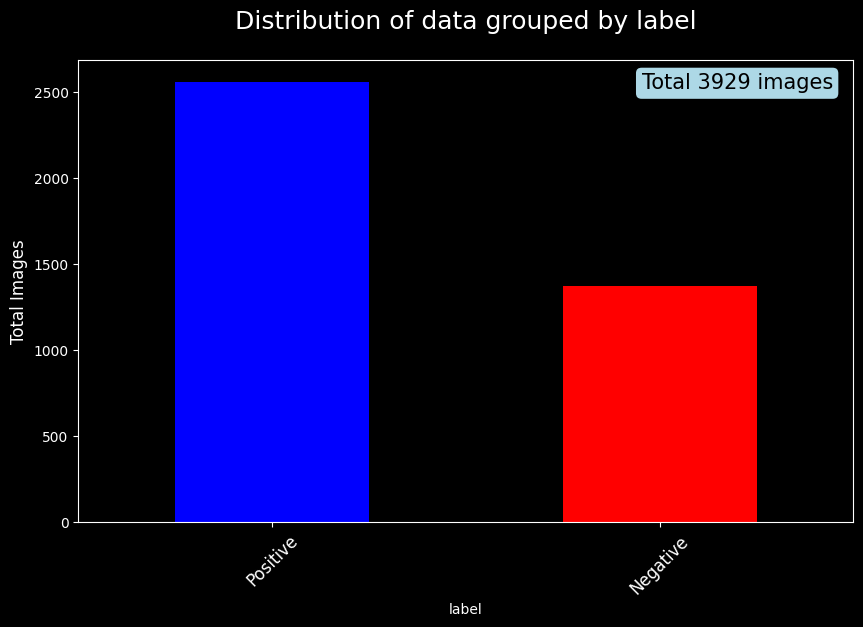

In [5]:
visualization = Visualization(df)
visualization.plot_distribution_grouped_by_label()

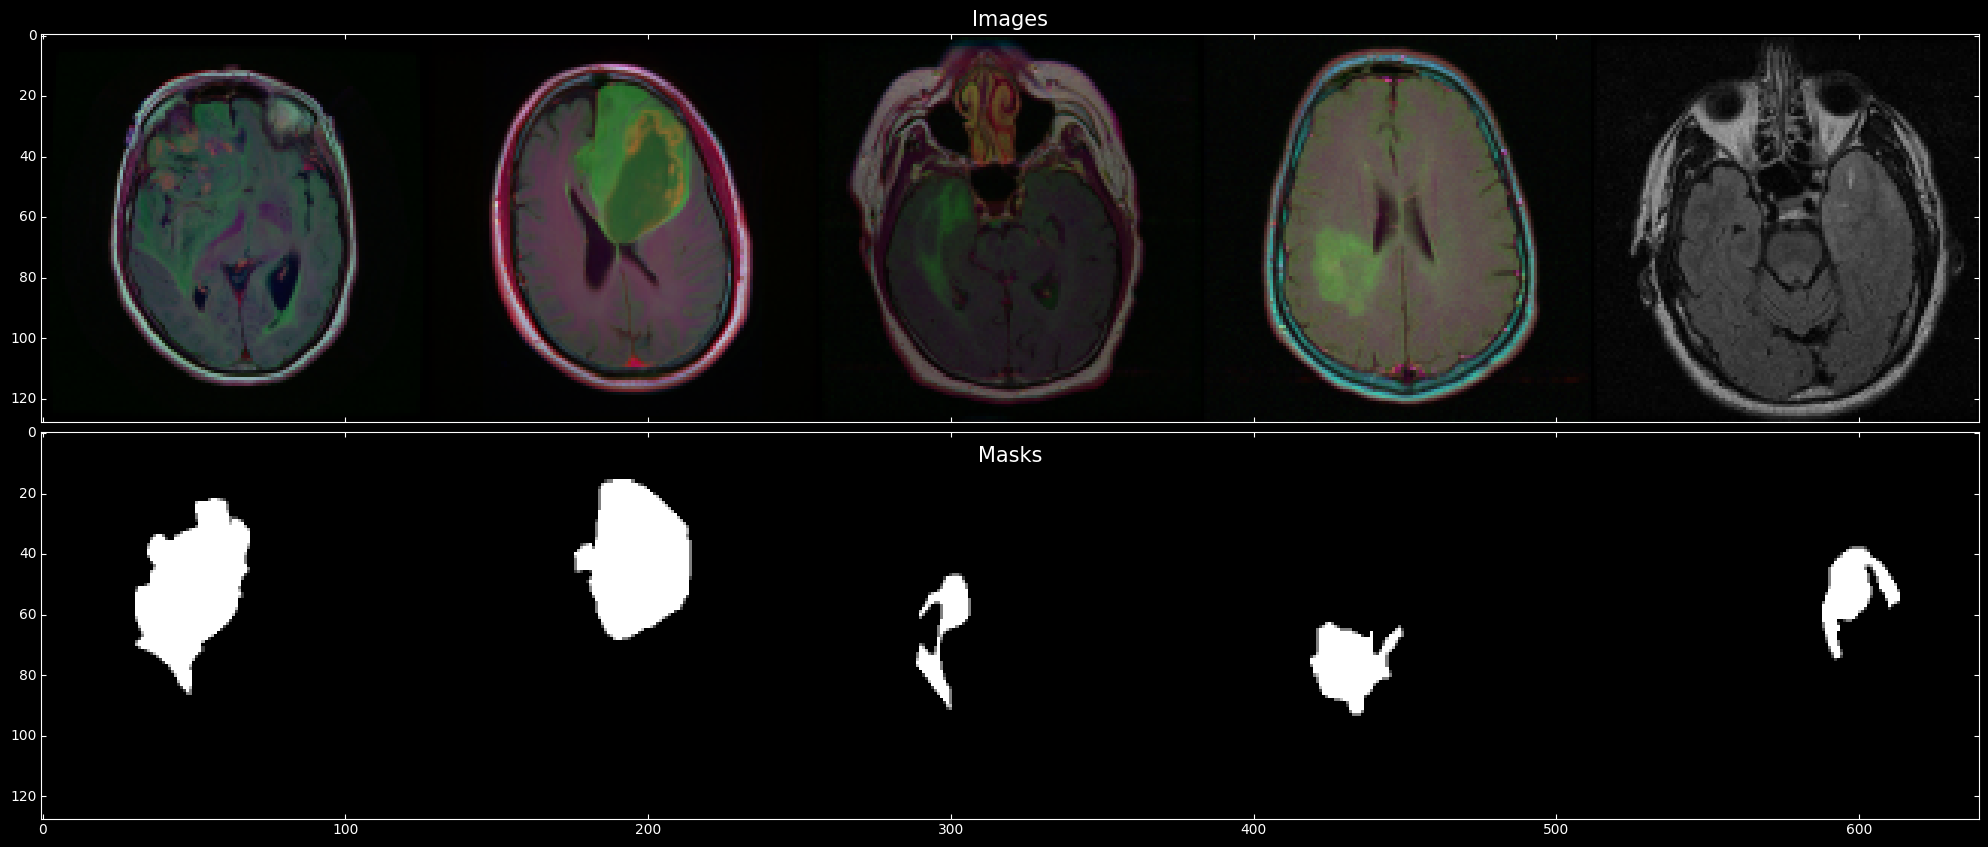

In [6]:
visualization = Visualization(df)
visualization.plot_images_and_masks()

#### Data Loading

In the code below, we have loaded 80% training, 10% validation, and a 10% test set with labels and metadata.

In [7]:
mask_df = df[df['label'] == 1]
mask_df.shape

(1373, 3)

In [8]:
from sklearn.model_selection import train_test_split
# Split df into train_df and val_df
train_df, val_df = train_test_split(mask_df, stratify=mask_df.label, test_size=0.1)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# Split train_df into train_df and test_df
val_df, test_df = train_test_split(val_df, stratify=val_df.label, test_size=0.3)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# train_df = train_df[:1000]
print(f"Train: {train_df.shape} \nVal: {val_df.shape} \nTest: {test_df.shape}")

Train: (1235, 3) 
Val: (96, 3) 
Test: (42, 3)


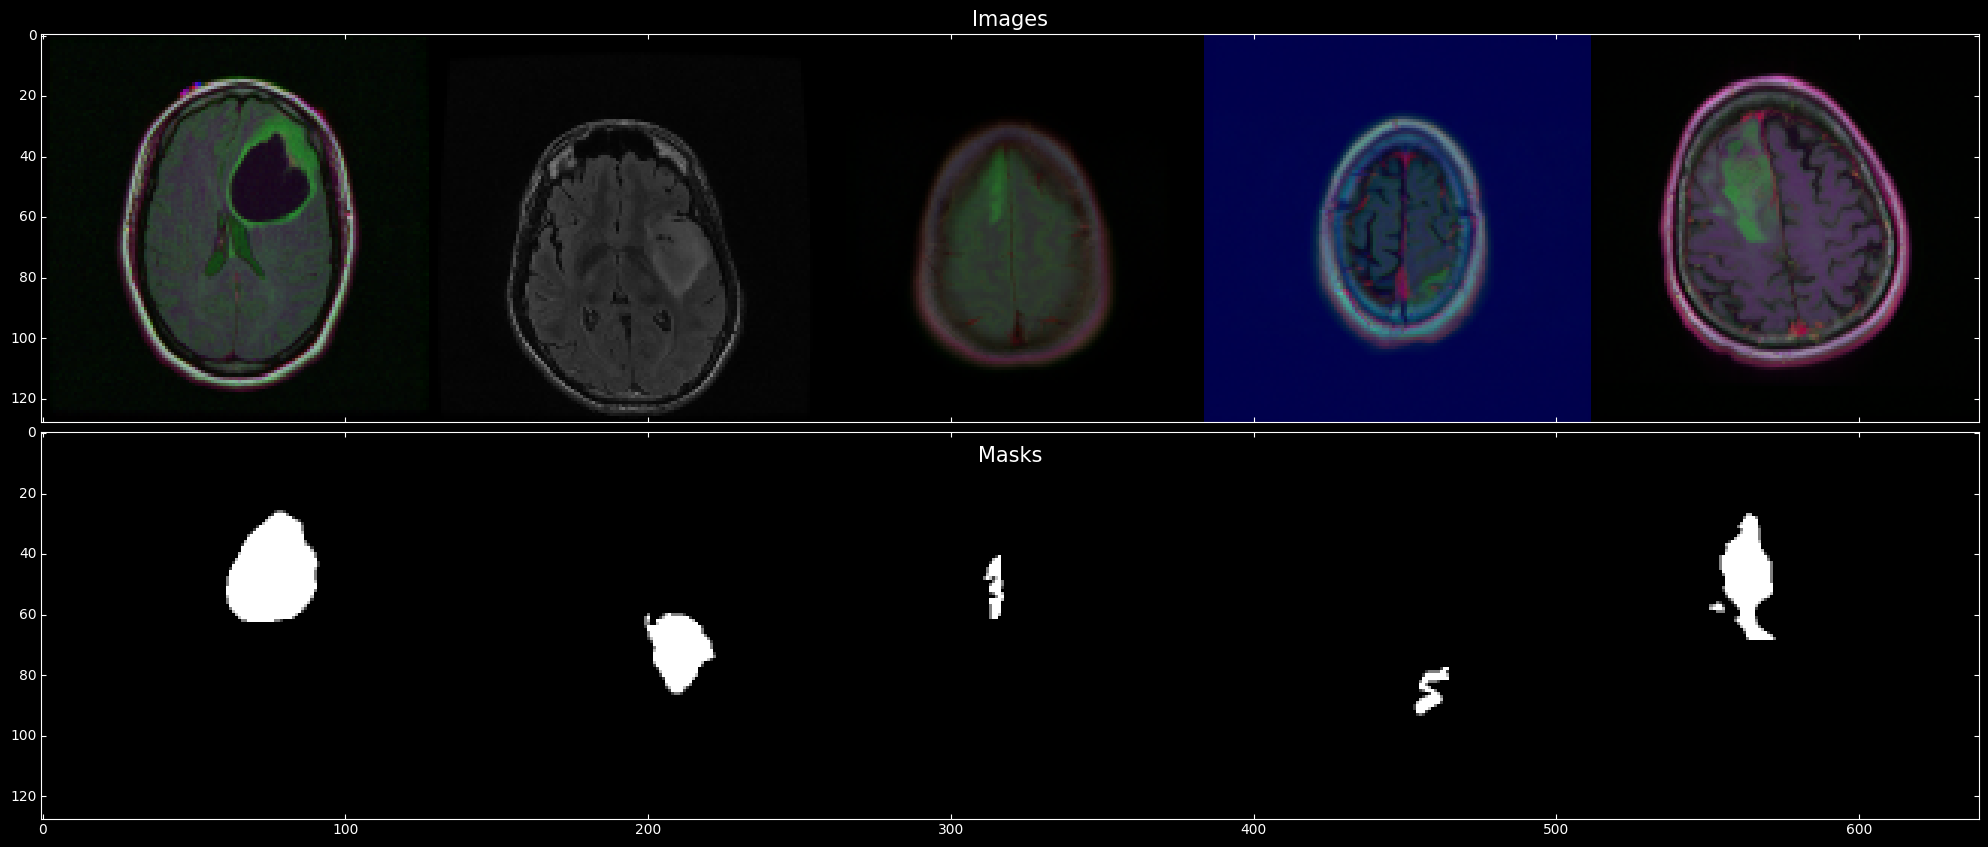

In [9]:
visualization = Visualization(train_df)
visualization.plot_images_and_masks()

#### Data Augmentation with Keras Sequential
We usually use keras.Sequential() to build the model, but we can also use it to add augmentation layers.

##### Resize and rescale


In the example, we are resizing and rescaling the image using Keras Sequential and image augmentation layers. We will first resize the image to 180X180 and then rescale it by 1/255. The small image size will help us save time, memory, and computing.

As we can see, we have successfully passed the image through the augmentation layer, and the final output is resized and rescaled.

#### GAN

In [10]:
train_df

,images_paths,masks_paths,label
0,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_...,1
1,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_6399_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_6399_...,1
2,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A4MU_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A4MU_...,1
3,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_...,1
4,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7014_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7014_...,1
...,...,...,...
1230,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_8164_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_8164_...,1
1231,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_7616_...,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_7616_...,1
1232,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_...,1
1233,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_...,1


In [11]:
from brain_mri_dataset import BrainMriDataset
from torch.utils.data import DataLoader
IMG_SIZE = 64
BATCH_SIZE = 26

# train
train_dataset = BrainMriDataset(df=train_df, img_size=IMG_SIZE)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

# val
val_dataset = BrainMriDataset(df=val_df, img_size=IMG_SIZE)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

#test
test_dataset = BrainMriDataset(df=test_df, img_size=IMG_SIZE)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

In [12]:
images, masks, labels = next(iter(train_dataloader))

In [13]:
print(images.shape, masks.shape)

torch.Size([26, 64, 64, 3]) torch.Size([26, 64, 64, 3])


In [14]:
print(images[0].shape, masks[0].shape)

torch.Size([64, 64, 3]) torch.Size([64, 64, 3])


In [24]:
import os
import pickle

model_path = 'generator.pkl'
print(os.path.exists(model_path))
if os.path.exists(model_path):
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
        print("Model loaded successfully.")
else:
    print("Model file does not exist.")

noise = np.random.normal(-1, 1, (num_images, 100))
model.predict(noise)


True


TypeError: Error when deserializing class 'ReLU' using config={'name': 'Generator-Hidden-Layer-Activation-2', 'trainable': True, 'dtype': 'float32', 'max_value': None, 'negative_slope': {'class_name': '__numpy__', 'config': {'value': 0.0, 'dtype': 'float32'}}, 'threshold': {'class_name': '__numpy__', 'config': {'value': 0.0, 'dtype': 'float32'}}}.

Exception encountered: '<' not supported between instances of 'dict' and 'float'

In [17]:
def display_images(images):
    fig, axs = plt.subplots(4, 4)
    count = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow((images[count] * 0.5) + 0.5)
            axs[i, j].axis('off')
            count += 1
    plt.show()

In [ ]:
display_images(generated_images)